# Decision Trees and Random Forests

We will use decision trees and random forests to investigate the penguins dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

alt.data_transformers.enable(max_rows=10000)

DataTransformerRegistry.enable('default')

In [2]:
df = sns.load_dataset("penguins").dropna()

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Part 1 - Decision boundaries for decision trees

Here is the visualization of data from the penguins dataset.  We use only the two columns specified in `cols` as our predictors.

In [4]:
cols = ["bill_length_mm", "bill_depth_mm"]

In [5]:
alt.Chart(df).mark_circle(size=100, opacity=1).encode(
    x=alt.X(cols[0], scale=alt.Scale(zero=False)),
    y=alt.Y(cols[1], scale=alt.Scale(zero=False)),
    color="species"
).configure_axis(
    grid=False
).properties(
    title="True data"
)

alt.Chart(...)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
def make_clf(n):
    clf=DecisionTreeClassifier(max_depth=7, max_leaf_nodes=n)
    clf.fit(df[cols],df["species"]),
    return clf

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

In [9]:
make_clf(2)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=2)

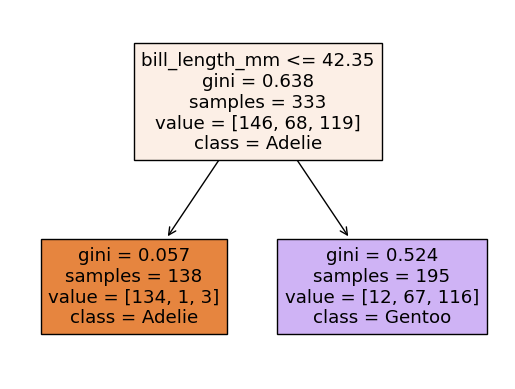

In [10]:
_ = tree.plot_tree(make_clf(2), 
    feature_names=make_clf(2).feature_names_in_,  
    class_names=make_clf(2).classes_,
    filled=True)

In [11]:
fig = plt.figure(figsize=(200,100))
_ = tree.plot_tree(make_clf(5), 
    feature_names=make_clf(5).feature_names_in_,  
    class_names=make_clf(5).classes_,
    filled=True)

In the following function, we take as input a number n, and as output returns an Altair chart using 10000 sample points in the region with "bill_length_mm" between 32 and 60 with step size 0.1, and with "bill_depth_mm" between 13 and 22 with step size 0.1

In [12]:
def draw_dec_bdry(n):
    l=np.arange(32,60,0.1)
    d=np.arange(13,22,0.1)
    ll, dd = np.meshgrid(l,d)
    df_sim = pd.DataFrame({cols[0]:ll.reshape(-1), cols[1]:dd.reshape(-1)})
    df_sim["pred"] = make_clf(n).predict(df_sim)
    df_sim2 = df_sim.sample(10000)
    return alt.Chart(df_sim2).mark_circle(opacity=1).encode(
    x=alt.X(cols[0], scale=alt.Scale(zero=False)),
    y=alt.Y(cols[1], scale=alt.Scale(zero=False)),
    color="pred"
).configure_axis(
    grid=False
).properties(
    title=f"Decision boundary with {n} leaf nodes"
)

In [13]:
draw_dec_bdry(5)

Example of a draw_dec_bdry chart which seems to be underfitting the true data.

In [14]:
draw_dec_bdry(2)

alt.Chart(...)

Example of a draw_dec_bdry chart which seems to be overfitting the true data.

In [15]:
draw_dec_bdry(40)

## Part 2: Train Error and Test Error curves for decision trees

In this part, we divide the penguins dataset into a training set and a test set, and then measure the training error and test error (using log loss, also called cross entropy).  This is similar to what we did above, except that we use all the numerical columns as predictors, not just bill length and bill depth.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,df["species"],train_size=0.8, random_state=0)

In [19]:
from sklearn.metrics import log_loss

In [20]:
train_error_dict={}

In [21]:
test_error_dict={}

In [22]:
for n in range(2,21):
    clf=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=n)
    clf.fit(X_train,y_train)
    train_error_dict[n]=log_loss(y_train, clf.predict_proba(X_train))
    test_error_dict[n]=log_loss(y_test, clf.predict_proba(X_test))

In [23]:
df_test = pd.DataFrame({"y":test_error_dict, "type": "test"})

In [24]:
df_train = pd.DataFrame({"y":train_error_dict, "type": "train"})

In [25]:
df_small = pd.concat([df_train, df_test]).reset_index()
df_small

,index,y,type
0,2,5.068906e-01,train
1,3,2.145985e-01,train
2,4,1.279182e-01,train
3,5,1.027978e-01,train
4,6,8.844037e-02,train
5,7,7.500238e-02,train
6,8,4.532514e-02,train
7,9,2.378895e-02,train
8,10,1.857732e-02,train
9,11,1.016303e-02,train


In [26]:
alt.Chart(df_small).mark_line(clip=True).encode(
    x="index:O",
    y="y",
    color="type"
)

alt.Chart(...)

When n=2 and n=3, we are underfitting the data. 

When n is larger than 9, the decision tree classifier will be the most accurate.

## Part 3: Random Forest

In this par, we compare the performance of a random forest to the performance of individual decision trees from above.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Specify a maximum depth of 7 and a maximum number of leaf nodes of 20.
rfe = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=20, max_depth=7)

In [29]:
rfe.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=20, n_estimators=1000)

In [30]:
log_loss(y_test,rfe.predict_proba(X_test))

0.09581951223214799

In [31]:
min(test_error_dict.values())

0.18844226722514673

Wisdom of crowds means collective knowledge is better than knowledge of the few. Wisdom of crowds means use many different decision trees to predict the data rather than using only one decision tree. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f93722d3-ea0c-4d61-93f2-b23d52280131' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>